In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Cargamos la Base de Datos como Dataframe utilizando Pandas

In [ ]:
df = pd.read_pickle("./path/training_set.pkl")  
print(df)

       class           oid                                      cutoutScience  \
0         SN  ZTF18acqyvag  b'\x1f\x8b\x08\x00\xc2Q\xf5[\x02\x03\xed\xbbW\...   
1         SN  ZTF19aarphwc  b'\x1f\x8b\x08\x00X\xc7\xca\\\x02\x03\xed\xbaU...   
2         SN  ZTF18acenqto  b'\x1f\x8b\x08\x00\x86\xf8\xe3[\x02\x03\xed\x9...   
3         SN  ZTF18acxgqxq  b'\x1f\x8b\x08\x00\xbb\x0b\x17\\\x02\x03\xed\x...   
4         SN  ZTF18abshezu  b'\x1f\x8b\x08\x00\xc2\xb8\x8b[\x02\x03\xed\xb...   
...      ...           ...                                                ...   
36257  bogus  ZTF19abyseqt  b'\x1f\x8b\x08\x008]{]\x02\x03\xed\x9byt\x93\x...   
36258  bogus  ZTF19abyshbe  b'\x1f\x8b\x08\x00\xcb^{]\x02\x03\xed\xba\x7fX...   
36259  bogus  ZTF19abysicz  b'\x1f\x8b\x08\x00\xcc_{]\x02\x03\xed\xbamX\x9...   
36260  bogus  ZTF19abytqsv  b'\x1f\x8b\x08\x00\xa5w{]\x02\x03\xed\x9a}x\xc...   
36261  bogus  ZTF19abytrfh  b'\x1f\x8b\x08\x00\xabx{]\x02\x03\xed\xbb\x7f\...   

                           

In [ ]:
for col in df.columns:
    print(col)

class
oid
cutoutScience
cutoutTemplate
cutoutDifference
sgscore1
distpsnr1
sgscore2
distpsnr2
sgscore3
distpsnr3
isdiffpos


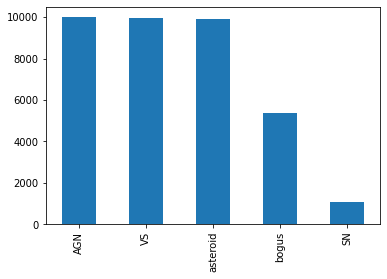

In [ ]:
ax = df['class'].value_counts().plot.bar()

Obtenemos la información de las imagenes de triple entrada

In [ ]:
import io, gzip
from astropy.io import fits
def get_image_from_bytes_stamp(stamp_byte):
  with gzip.open(io.BytesIO(stamp_byte), 'rb') as f:
    with fits.open(io.BytesIO(f.read()), ignore_missing_simple=True) as hdul:
      img = hdul[0].data
  return img


In [ ]:
df['cutoutScience'] = df['cutoutScience'].apply(get_image_from_bytes_stamp)
df['cutoutTemplate'] = df['cutoutTemplate'].apply(get_image_from_bytes_stamp)
df['cutoutDifference'] = df['cutoutDifference'].apply(get_image_from_bytes_stamp)



In [ ]:
df2 = df.groupby('class').sample(n=10, random_state=1, replace=True)
indexes = df2.index.tolist()
classes = df2['class'].values.tolist()
Science = df2['cutoutScience'].values.tolist()
Template = df2['cutoutTemplate'].values.tolist()
Difference = df2['cutoutDifference'].values.tolist()

Ploteamos cada 10 ejemplos por clase por cada canal de datos

<ipython-input-9-ab7274993e62>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 10, j+1)


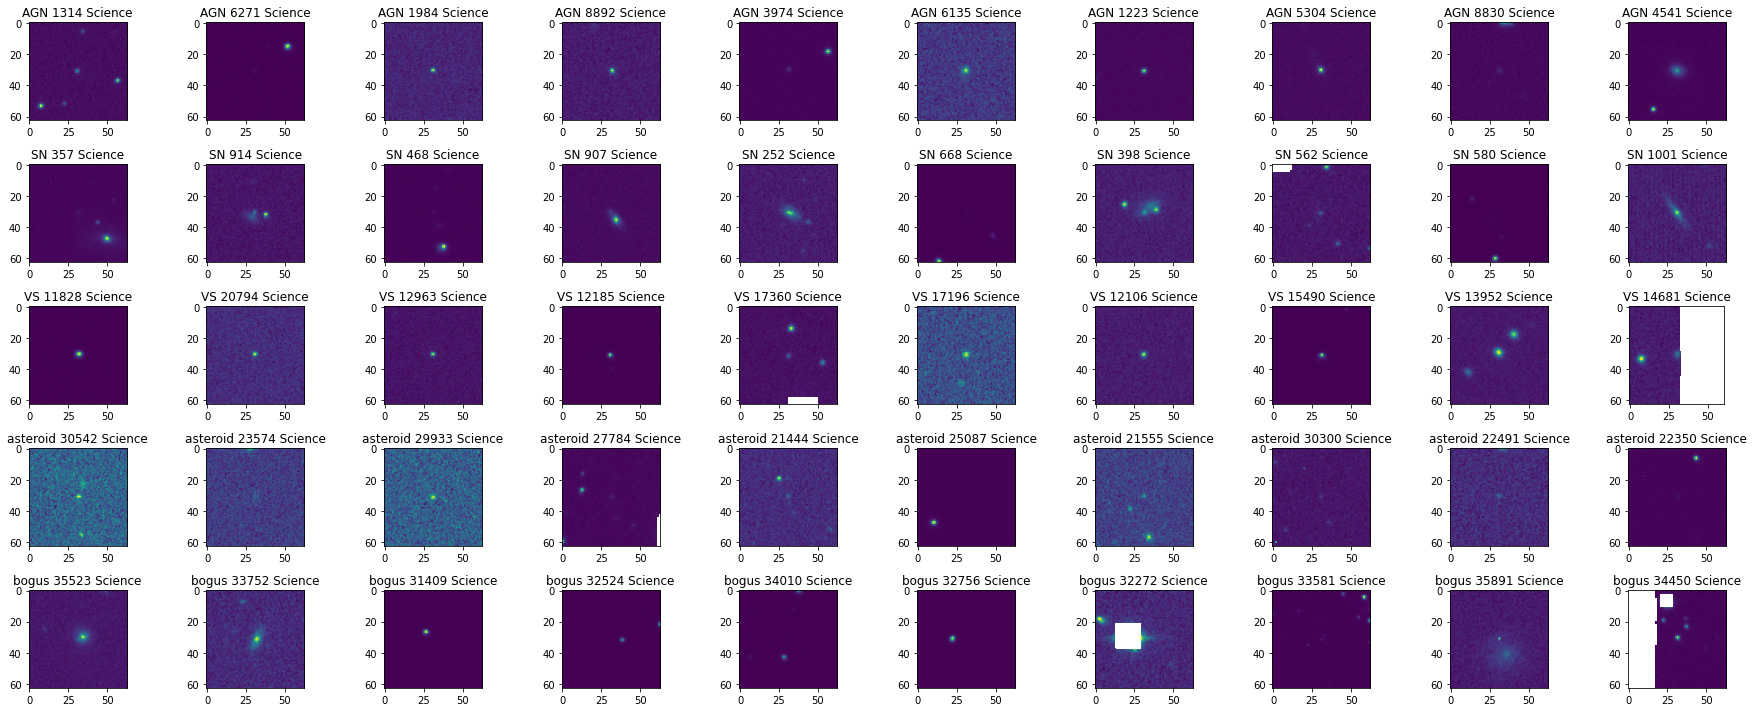

In [ ]:
plt.subplots(figsize=(25, 10))
j=0
while j <= len(classes)-1:
  plt.subplot(5, 10, j+1)
  plt.title(str(classes[j]) + ' ' + str(indexes[j]) + ' ' + str('Science') )
  plt.imshow(Science[j])
  j=j+1
plt.tight_layout()

<ipython-input-10-153f35def6c3>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 10, j+1)


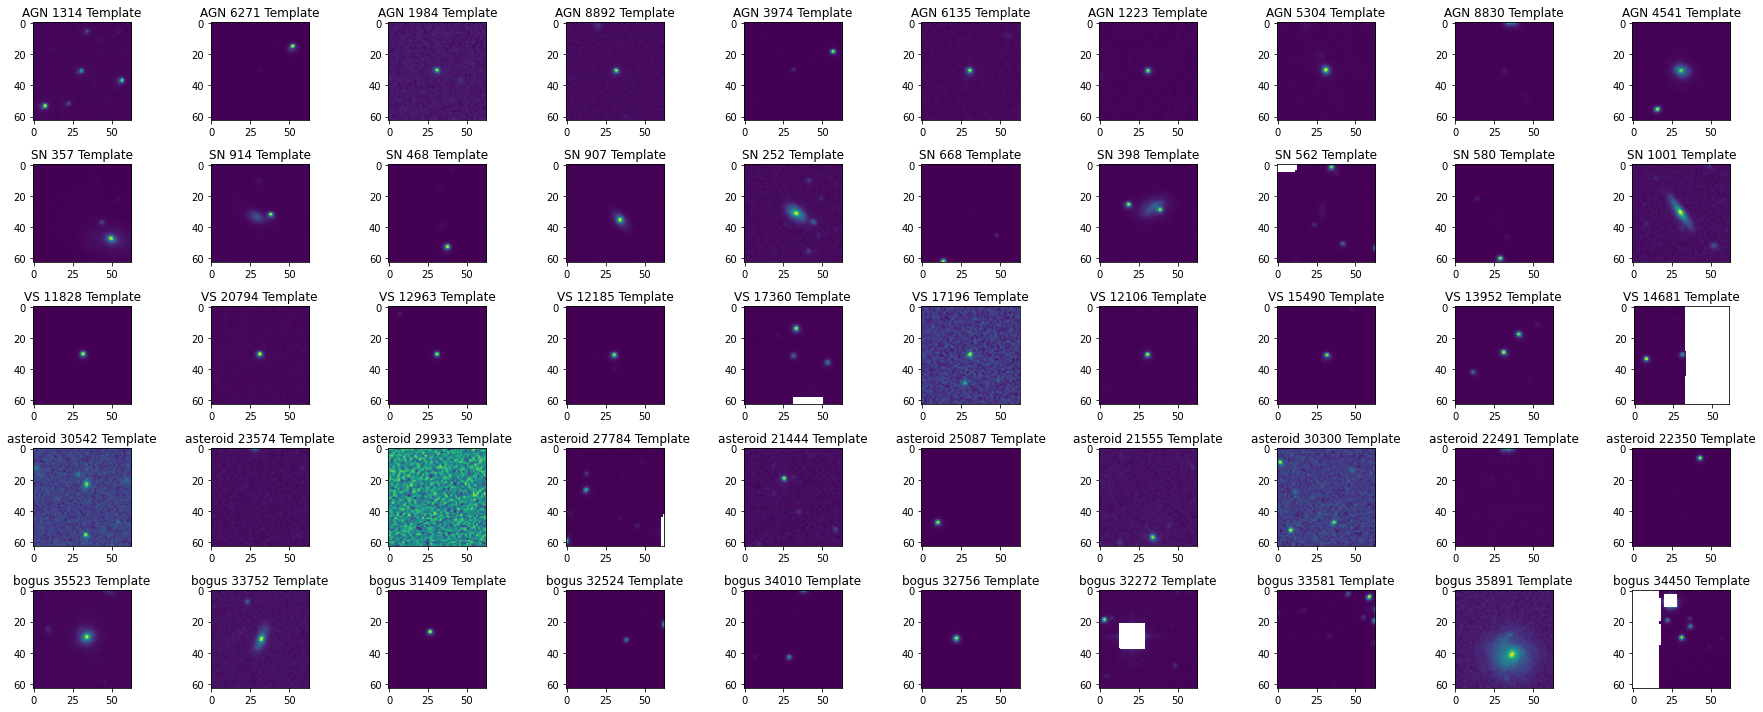

In [ ]:
plt.subplots(figsize=(25, 10))
j=0
while j <= len(classes)-1:
  plt.subplot(5, 10, j+1)
  plt.title(str(classes[j]) + ' ' + str(indexes[j]) + ' ' + str('Template') )
  plt.imshow(Template[j])
  j=j+1
plt.tight_layout()

<ipython-input-11-5f1efacd87d7>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 10, j+1)


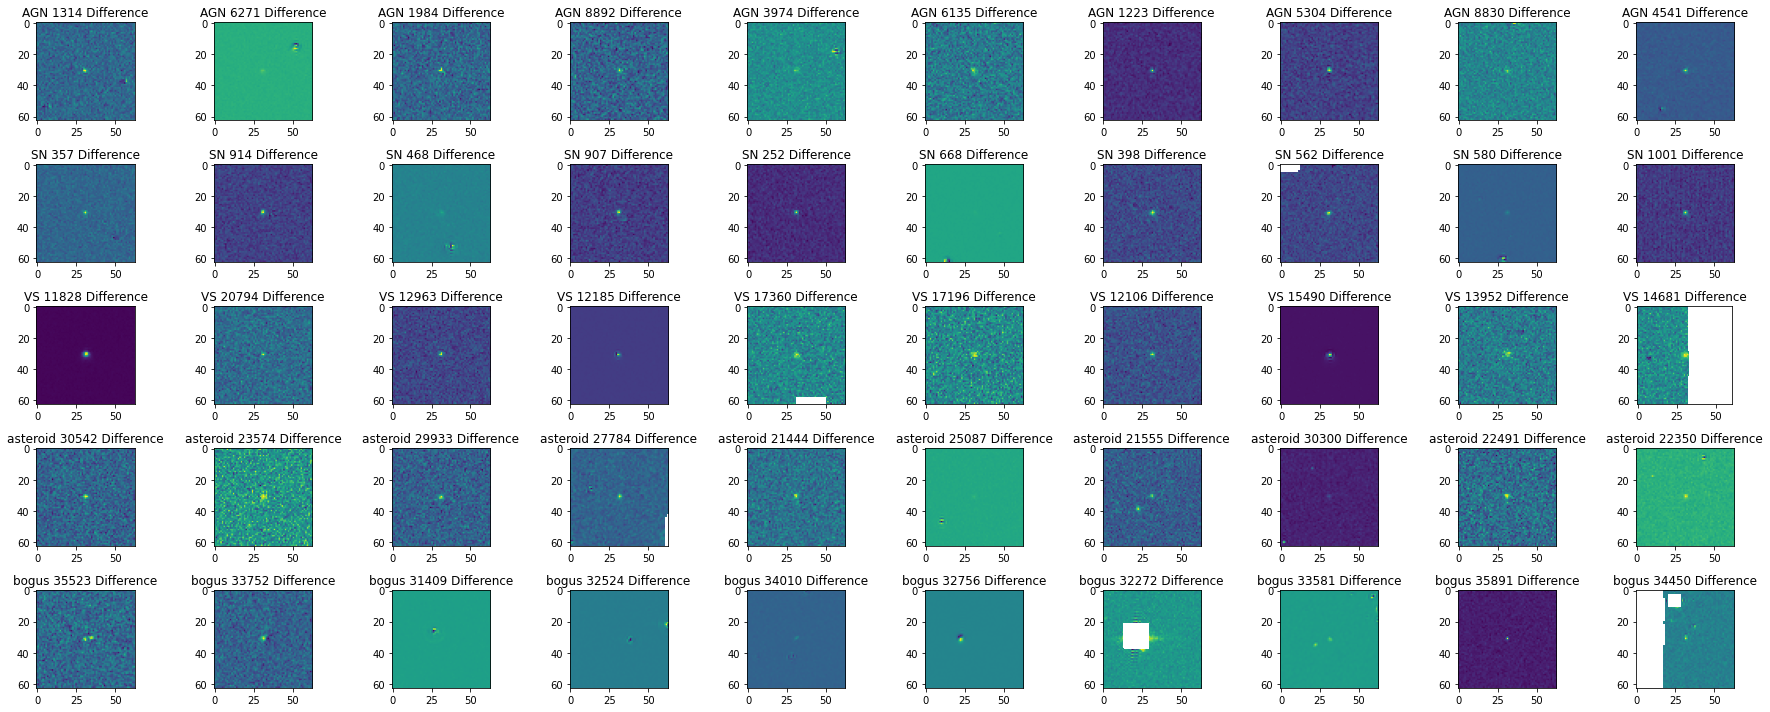

In [ ]:
plt.subplots(figsize=(25, 10))
j=0
while j <= len(classes)-1:
  plt.subplot(5, 10, j+1)
  plt.title(str(classes[j]) + ' ' + str(indexes[j]) + ' ' + str('Difference') )
  plt.imshow(Difference[j])
  j=j+1
plt.tight_layout()

In [ ]:
print(df['cutoutScience'].iloc[0])

[[154.62643 146.14447 143.38727 ... 146.14064 146.97699 140.71602]
 [147.1579  141.00232 146.47751 ... 139.94188 138.34796 143.15625]
 [142.63928 135.44177 145.96356 ... 145.90369 133.66904 141.83817]
 ...
 [138.74762 138.2952  140.43427 ... 152.02481 146.62566 151.59445]
 [151.60416 141.26312 140.51419 ... 133.17514 145.3508  151.76527]
 [149.54306 143.6199  144.05035 ... 139.86629 146.27701 140.31783]]


Diseñamos la matriz X y eliminamos los nan reemplazando por las medianas de las imagenes.

In [ ]:
Y= df.index.values
X= np.zeros((len(Y), 3, 21, 21))
i=0
while i <= len(Y)-1:
  j=20
  while j <= 40:
    k=20
    while k<= 40:
      X[i][0][j-20][k-20] = df['cutoutScience'].iloc[i][j][k]
      X[i][1][j-20][k-20] = df['cutoutTemplate'].iloc[i][j][k]
      X[i][2][j-20][k-20] = df['cutoutDifference'].iloc[i][j][k]
      k= k+1
    j=j+1
  i=i+1


In [ ]:
X2 = np.zeros((len(Y), 3))
i=0
while i <= len(Y)-1:
  X2[i][0]= np.nanmedian(X[i][0])
  X2[i][1]= np.nanmedian(X[i][1])
  X2[i][2]= np.nanmedian(X[i][2])
  i=i+1

In [ ]:
X3 = np.zeros((len(Y), 3, 21, 21))
z=0
i=0
while i <= len(Y)-1:
  j=0
  while j <= 20:
    k=0
    while k<= 20:
      X3[i][0][j][k] = X[i][0][j][k]
      X3[i][1][j][k] = X[i][1][j][k]
      X3[i][2][j][k] = X[i][2][j][k]
      if np.isnan(X3[i][0][j][k]) == True:
        X3[i][0][j][k] = X2[i][0]
        z=z+1

      if np.isnan(X3[i][1][j][k]) == True:
        X3[i][1][j][k] = X2[i][1]
        z=z+1
      if np.isnan(X3[i][2][j][k]) == True:
        X3[i][2][j][k] = X2[i][2]
        z=z+1
      k= k+1
    j=j+1
  i=i+1

Normalizamos las imagenes 

In [ ]:
from sklearn.preprocessing import normalize
X4 = np.zeros((len(Y), 3, 21, 21))
i=0
while i <= len(Y)-1:
  X4[i][0]= normalize(X3[i][0])
  X4[i][1]= normalize(X3[i][1])
  X4[i][2]= normalize(X3[i][2])
  i=i+1


Cambiamos la forma de la matriz para poder entregarsela a la neural network mejor.

In [ ]:
XF = np.zeros((len(Y), 21, 21, 3))
z=0
i=0
while i <= len(Y)-1:
  j=0
  while j <= 20:
    k=0
    while k<= 20:
      XF[i][j][k][0] = X4[i][0][j][k]
      XF[i][j][k][1] = X4[i][1][j][k]
      XF[i][j][k][2] = X4[i][2][j][k]
      k= k+1
    j=j+1
  i=i+1

Realizamos el train-test split.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
dff= df.replace({'AGN': 0, 'SN': 1, 'VS':2, 'asteroid':3, 'bogus':4})
Y= dff['class'].values.tolist()
Y2 = np.array(Y)
Y3= Y2.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(XF, Y3, test_size=0.3, random_state=1)


/usr/local/lib/python3.9/dist-packages/pandas/core/array_algos/replace.py:85: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  op = lambda x: operator.eq(x, b)


Importamos tensorflow y definimos el modelo.

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
tf.__version__

'2.11.0'

In [ ]:
Model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(21,21,3)),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(50,activation='relu'),
  tf.keras.layers.Dense(10,activation='softmax'),
])

In [ ]:
Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 19, 19, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 9, 32)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 2592)              0         
                                                                 
 dropout (Dropout)           (None, 2592)              0         
                                                                 
 dense (Dense)               (None, 50)                129650    
                                                                 
 dense_1 (Dense)             (None, 10)                510       
                                                        

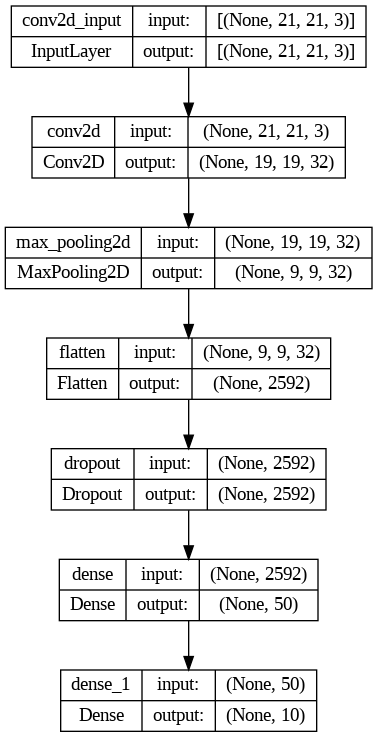

In [ ]:
tf.keras.utils.plot_model(Model, show_shapes=True)

Fiteamos el modelo.

In [ ]:
%reload_ext tensorboard
import datetime
Model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
log_dir3 = "logs3/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir3, histogram_freq=1)
history = Model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_train, y_train),
                    callbacks=[tensorboard_callback])


Epoch 1/10


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


794/794 [==============================] - 19s 22ms/step - loss: 0.8234 - accuracy: 0.7151 - val_loss: 0.6028 - val_accuracy: 0.8192
Epoch 2/10
794/794 [==============================] - 21s 26ms/step - loss: 0.5602 - accuracy: 0.8197 - val_loss: 0.4909 - val_accuracy: 0.8485
Epoch 3/10
794/794 [==============================] - 15s 19ms/step - loss: 0.4849 - accuracy: 0.8436 - val_loss: 0.4323 - val_accuracy: 0.8580
Epoch 4/10
794/794 [==============================] - 14s 18ms/step - loss: 0.4377 - accuracy: 0.8568 - val_loss: 0.3971 - val_accuracy: 0.8653
Epoch 5/10
794/794 [==============================] - 15s 18ms/step - loss: 0.4053 - accuracy: 0.8664 - val_loss: 0.3601 - val_accuracy: 0.8815
Epoch 6/10
794/794 [==============================] - 13s 17ms/step - loss: 0.3789 - accuracy: 0.8737 - val_loss: 0.3322 - val_accuracy: 0.8906
Epoch 7/10
794/794 [==============================] - 15s 19ms/step - loss: 0.3601 - accuracy: 0.8814 - val_loss: 0.3126 - val_accuracy: 0.8957
Epo

Printeamos la matriz de confusion.

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

340/340 [==============================] - 2s 5ms/step
Confusion matrix, without normalization


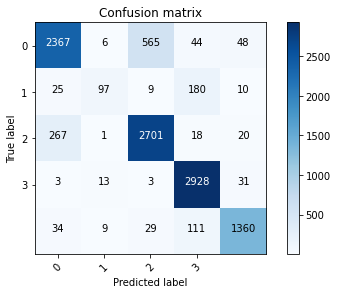

In [ ]:
predictions = Model.predict(X_test)
plot_confusion_matrix(confusion_matrix(y_test, np.argmax(predictions, axis=1)), range(4))

In [ ]:
predictions2 = np.argmax(predictions, axis=1)

Y_real = []
WX = []

i=0
while i <= len(predictions2)-1:
  if predictions2[i] != y_test[i]:
    WX.append(X_test[i])
    Y_real.append(y_test[i])
  i=i+1

In [ ]:
L0 = []
L1 = []
L2 = []
L3 = []
L4 = []

j=0
while j <= len(WX)-1:
  if Y_real[j] == 0:
    L0.append(WX[j])
  elif Y_real[j] == 1:
    L1.append(WX[j])
  elif Y_real[j] == 2:
    L2.append(WX[j])
  elif Y_real[j] == 3:
    L3.append(WX[j])
  elif Y_real[j] == 4:
    L4.append(WX[j])
  j=j+1


In [ ]:
import random as rd
Xf0= rd.sample(L0, 10)
Xf1= rd.sample(L1, 10)
Xf2= rd.sample(L2, 10)
Xf3= rd.sample(L3, 10)
Xf4= rd.sample(L4, 10)

Ploteamos objetos erroneamente clasificados de cada clase

<ipython-input-31-6764b973ca89>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 5, j+1)


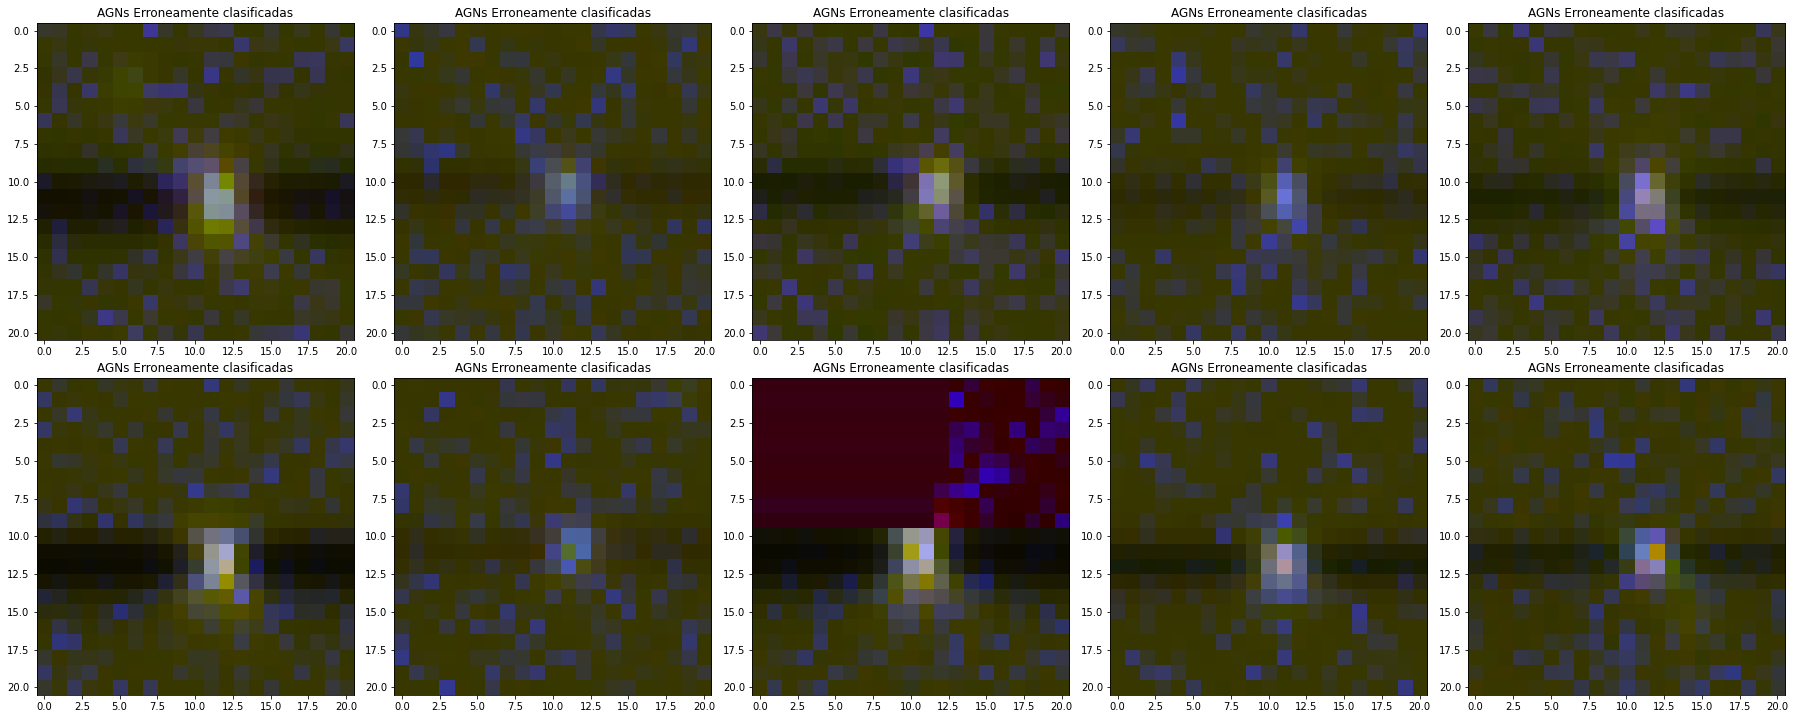

In [ ]:
plt.subplots(figsize=(25, 10))
j=0
while j <= len(Xf0)-1:
  plt.subplot(2, 5, j+1)
  plt.title(str('AGNs') + ' ' + str('Erroneamente clasificadas'))
  plt.imshow(Xf0[j])
  j=j+1
plt.tight_layout()

<ipython-input-32-22a181edc80b>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 5, j+1)


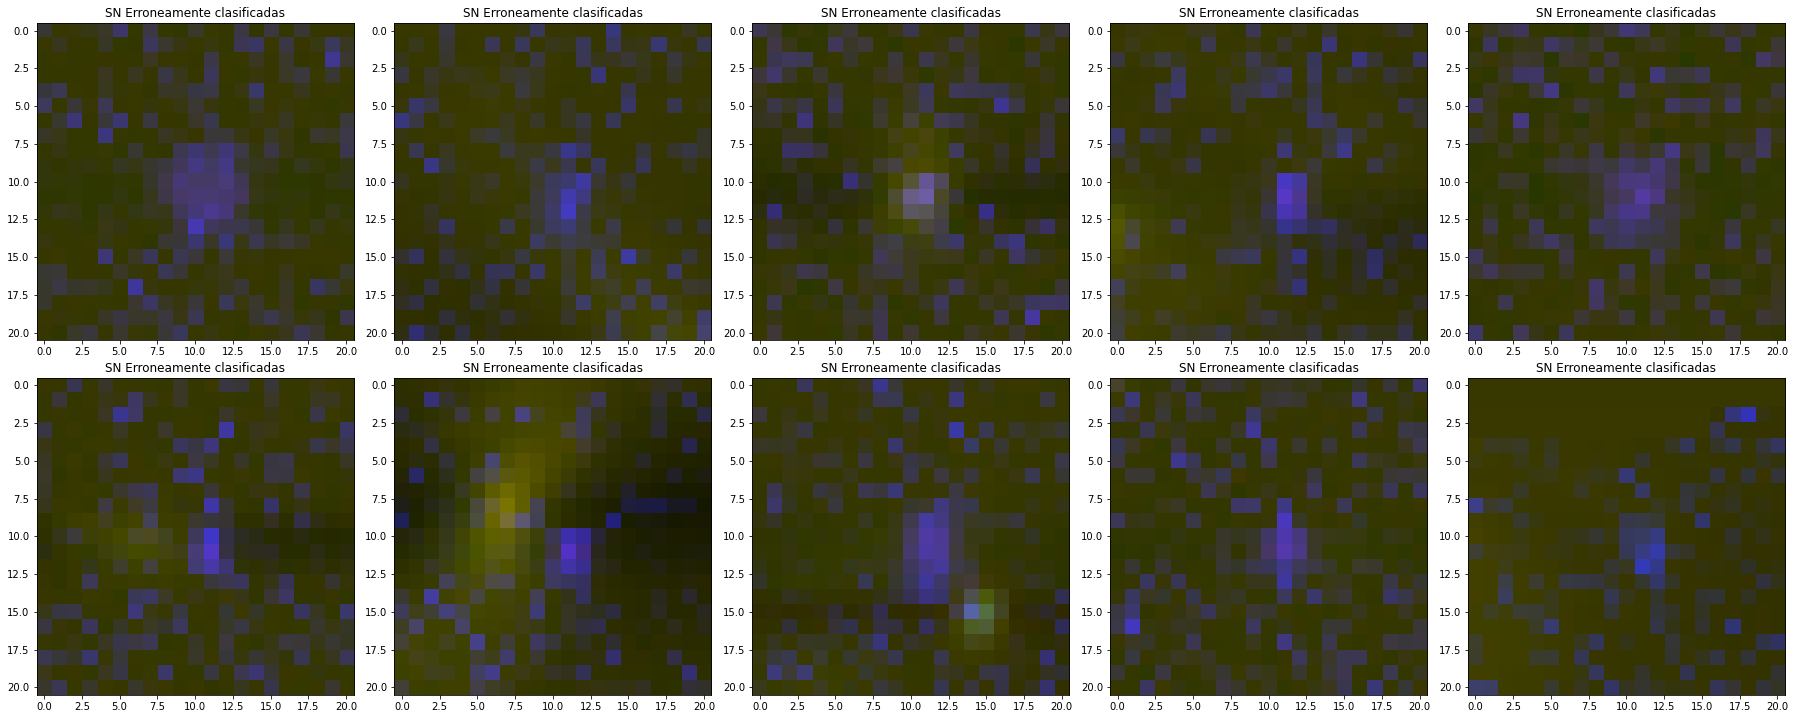

In [ ]:
plt.subplots(figsize=(25, 10))
j=0
while j <= len(Xf0)-1:
  plt.subplot(2, 5, j+1)
  plt.title(str('SN') + ' ' + str('Erroneamente clasificadas'))
  plt.imshow(Xf1[j])
  j=j+1
plt.tight_layout()

<ipython-input-33-28f7e98bf3ab>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 5, j+1)


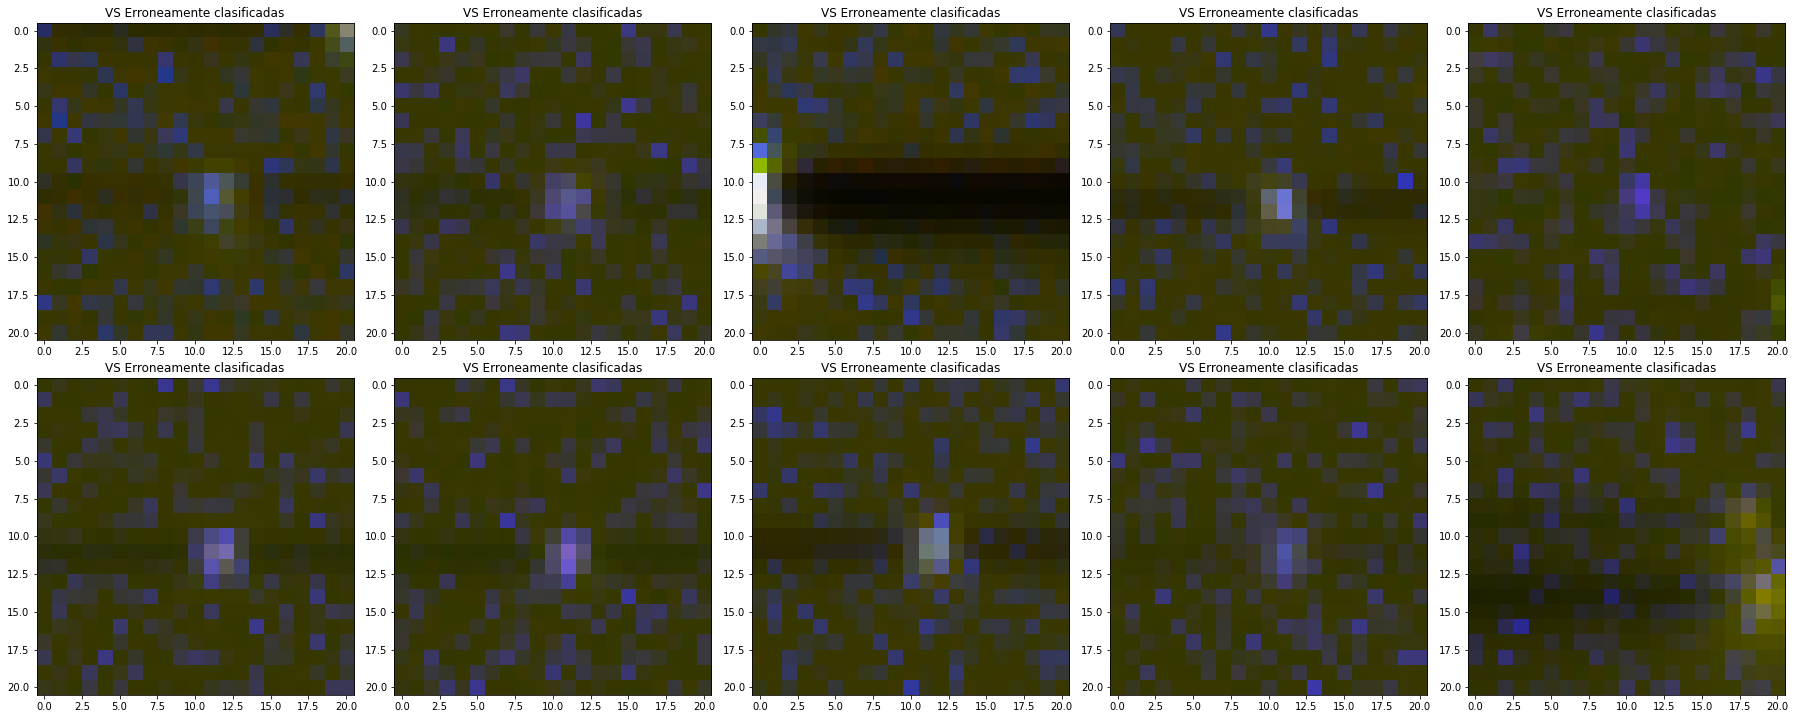

In [ ]:
plt.subplots(figsize=(25, 10))
j=0
while j <= len(Xf0)-1:
  plt.subplot(2, 5, j+1)
  plt.title(str('VS') + ' ' + str('Erroneamente clasificadas'))
  plt.imshow(Xf2[j])
  j=j+1
plt.tight_layout()

<ipython-input-34-180f4283f58f>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 5, j+1)


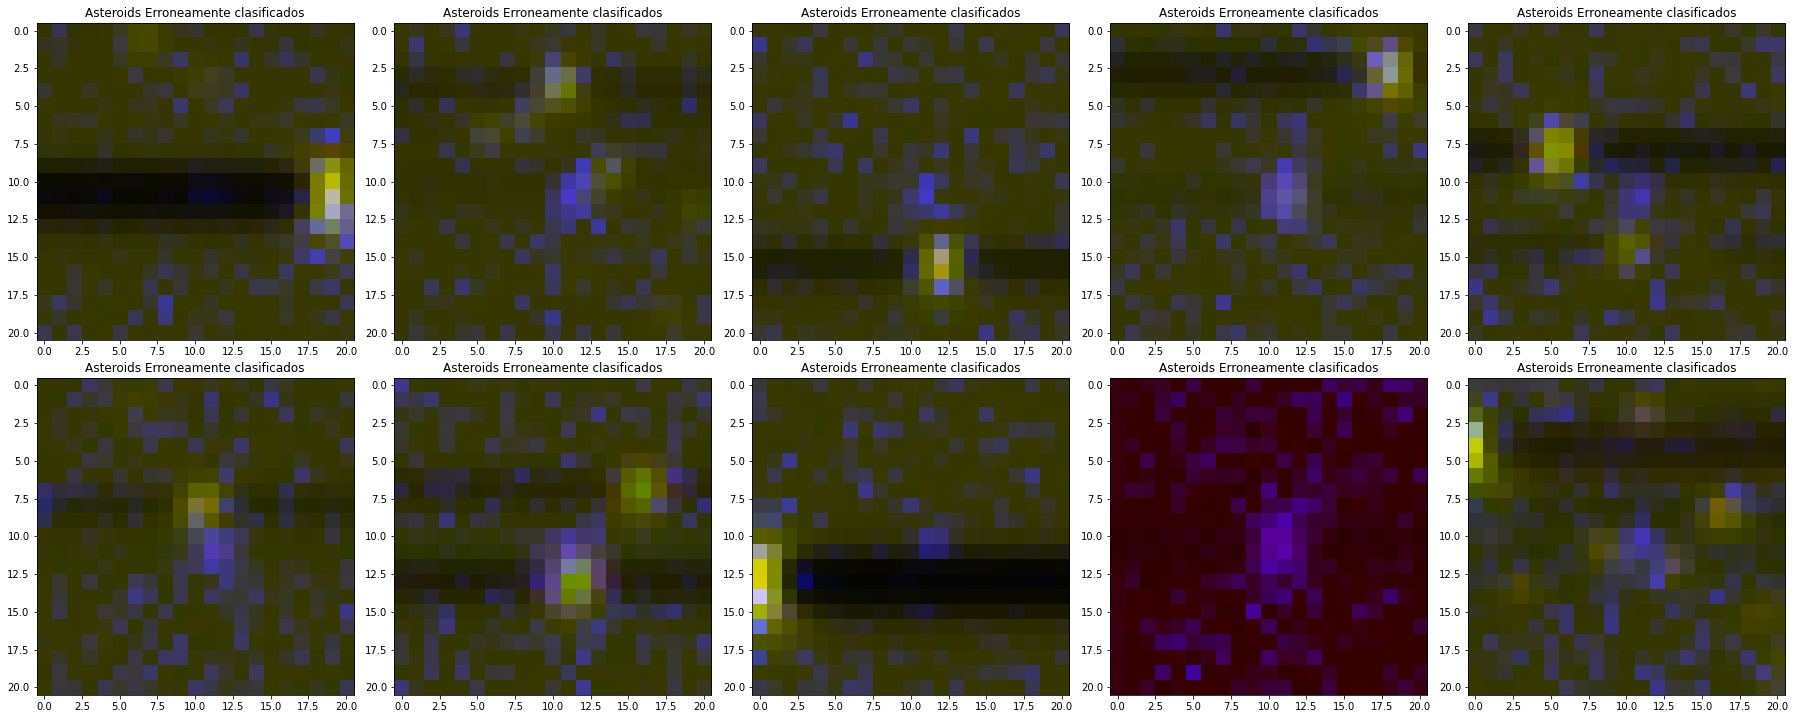

In [ ]:
plt.subplots(figsize=(25, 10))
j=0
while j <= len(Xf0)-1:
  plt.subplot(2, 5, j+1)
  plt.title(str('Asteroids') + ' ' + str('Erroneamente clasificados'))
  plt.imshow(Xf3[j])
  j=j+1
plt.tight_layout()

<ipython-input-35-94205882e188>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 5, j+1)


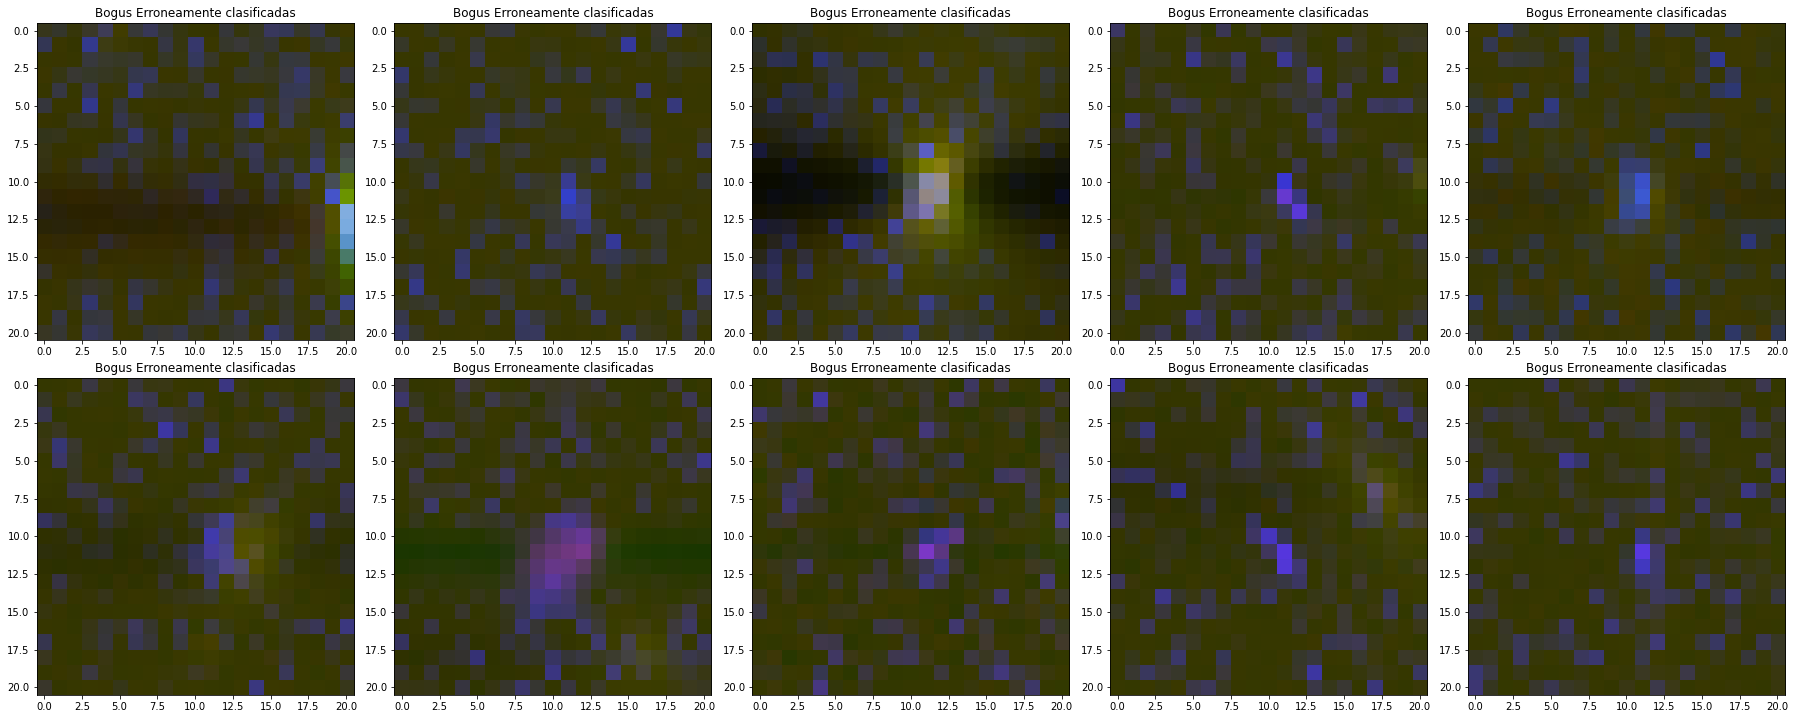

In [ ]:
plt.subplots(figsize=(25, 10))
j=0
while j <= len(Xf0)-1:
  plt.subplot(2, 5, j+1)
  plt.title(str('Bogus') + ' ' + str('Erroneamente clasificadas'))
  plt.imshow(Xf4[j])
  j=j+1
plt.tight_layout()

Se observa en bastantes de los objetos erroneamente clasificados que las imagenes contaban con algunos problemas de contaminacion.

Serializamos el modelo.

In [ ]:
Model.save("./path/Model")

Guardamos algunos datos para probar el modelo serializado.

In [ ]:
Prueba = df.sample(n=10, random_state=1)
Prueba.to_pickle("./path/data.pkl")